In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
dataset=pd.read_csv('E-com_Data.csv')
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,29-10-2017,6,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,5/10/2017,2,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,12/10/2017,2,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,22-08-2017,3,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,10/10/2017,2,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  int64  
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  int64  
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(4), int64(2), object(6)
memory usage: 49.3+ MB


In [49]:
dataset.describe()

,CustomerID,InvoieNo,Quantity,price per Unit,Price,Sold as set
count,404189.000000,537979.000000,537979.000000,537979.000000,537979.000000,0.0
mean,2181.909035,385017.572063,9.343339,378.339062,2161.414593,NaN
std,1252.681881,13426.052649,27.623322,440.048823,4538.487177,NaN
min,2.000000,361429.000000,-2003.000000,1.000000,-10152.000000,NaN
25%,1207.000000,372961.000000,1.000000,169.000000,451.000000,NaN
50%,2078.000000,385706.000000,3.000000,261.000000,1194.000000,NaN
75%,3291.000000,396873.000000,10.000000,456.000000,2232.000000,NaN
max,4372.000000,406651.000000,3186.000000,64973.000000,90400.000000,NaN


In [50]:
dataset['CustomerID'].value_counts()

4043.0    7971
1896.0    5874
1301.0    5099
331.0     4615
1675.0    2779
          ... 
2198.0       1
3209.0       1
2251.0       1
3127.0       1
3244.0       1
Name: CustomerID, Length: 4349, dtype: int64

In [51]:
dataset.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        2900
Price                13529
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [52]:
print(dataset.isna().sum()/len(dataset)*100)

CustomerID            24.869000
Item Code              0.000000
InvoieNo               0.000000
Date of purchase       0.000000
Quantity               0.000000
Time                   0.000000
price per Unit         0.000000
Price                  0.000000
Shipping Location      0.000000
Cancelled_status      98.448824
Reason of return      99.999442
Sold as set          100.000000
dtype: float64


In [53]:
dataset.duplicated().sum()

9

In [54]:
dataset.rename(columns={'InvoieNo':'InvoiceNo', 'Date of purchase':'Date'},inplace=True)

In [55]:
dataset.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,29-10-2017,6,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,5/10/2017,2,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,12/10/2017,2,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,22-08-2017,3,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,10/10/2017,2,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [56]:
dataset.isna().sum()

CustomerID           133790
Item Code                 0
InvoiceNo                 0
Date                      0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529634
Reason of return     537976
Sold as set          537979
dtype: int64

In [57]:
dataset=dataset.drop_duplicates(ignore_index=True)

In [58]:
dataset.isna().sum()

CustomerID           133789
Item Code                 0
InvoiceNo                 0
Date                      0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529625
Reason of return     537967
Sold as set          537970
dtype: int64

In [59]:
dataset.duplicated().sum()

0

In [60]:
# missing customerid - drop
dataset=dataset.dropna(subset=['CustomerID'])

In [61]:
dataset.isna().sum()

CustomerID                0
Item Code                 0
InvoiceNo                 0
Date                      0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     395998
Reason of return     404181
Sold as set          404181
dtype: int64

In [62]:
dataset.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,29-10-2017,6,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,5/10/2017,2,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,12/10/2017,2,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,22-08-2017,3,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,10/10/2017,2,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [63]:
dataset['Date']=pd.to_datetime(dataset['Date'])

In [64]:
dataset.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-05-10,2,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-12-10,2,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [65]:
# creating one more date column
dataset['Date1']=dataset['Date']

In [66]:
dataset.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Date1
0,4355.0,15734,398177,2017-10-29,6,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN,2017-10-29
1,4352.0,14616,394422,2017-05-10,2,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN,2017-05-10
2,4352.0,14614,394422,2017-12-10,2,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN,2017-12-10
3,4352.0,85014B,388633,2017-08-22,3,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN,2017-08-22
4,4352.0,15364,394422,2017-10-10,2,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN,2017-10-10


In [67]:
# Recency = Latest Date - Last invoice data
# latest date = today's date or 

# Frequency = # of invoice n. of the transaction done by customer

# Monetary = Sum of total amount purchased by customer

In [68]:
dataset['Date'].describe()

count                  404181
unique                    381
top       2017-11-24 00:00:00
freq                     2522
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [69]:
import datetime as dt
latest_date=dt.datetime(2017,12,20)

In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537940
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404181 non-null  float64       
 1   Item Code          404181 non-null  object        
 2   InvoiceNo          404181 non-null  int64         
 3   Date               404181 non-null  datetime64[ns]
 4   Quantity           404181 non-null  int64         
 5   Time               404181 non-null  object        
 6   price per Unit     404181 non-null  float64       
 7   Price              404181 non-null  float64       
 8   Shipping Location  404181 non-null  object        
 9   Cancelled_status   8183 non-null    object        
 10  Reason of return   0 non-null       object        
 11  Sold as set        0 non-null       float64       
 12  Date1              404181 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(2), 

In [71]:
RFMScores=dataset.groupby('CustomerID').agg({'Date1':
                                            lambda x:(latest_date-x.max()).days,
                                            'Date':lambda x : x.nunique(),
                                            'Price': lambda x :x.sum()})


# convert invoice date into int
RFMScores['Date']=RFMScores['Date'].astype(int)

# rename column as recency frequency monetary
RFMScores.rename(columns={'Date1': 'Recency', 'Date': "Frequency", 'Price':'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,63,553704.0
1,3.0,77,18,257404.0
2,4.0,20,10,176613.0
3,5.0,18,7,41976.0
4,6.0,9,42,151822.0


In [72]:
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,63,553704.0
1,3.0,77,18,257404.0
2,4.0,20,10,176613.0
3,5.0,18,7,41976.0
4,6.0,9,42,151822.0


In [73]:
RFMScores['Recency'].describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

<AxesSubplot:xlabel='Recency', ylabel='Density'>

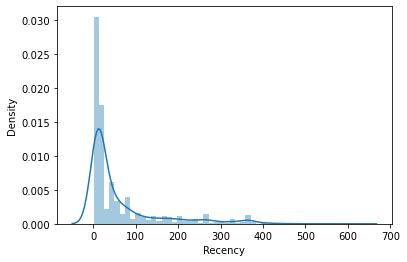

In [74]:
sns.distplot(RFMScores['Recency'])

In [75]:
RFMScores['Frequency'].describe()

count    4349.000000
mean       27.396643
std        33.594882
min         1.000000
25%         9.000000
50%        16.000000
75%        33.000000
max       378.000000
Name: Frequency, dtype: float64

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

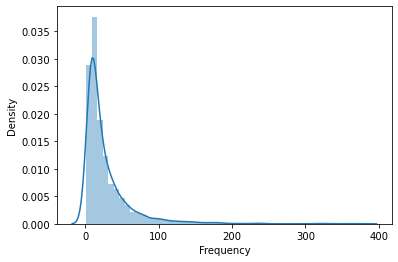

In [76]:
sns.distplot(RFMScores['Frequency'])

In [77]:
RFMScores['Monetary'].describe()

count    4.349000e+03
mean     2.299380e+05
std      8.572589e+05
min     -5.037200e+04
25%      3.814800e+04
50%      8.365500e+04
75%      2.056120e+05
max      3.553619e+07
Name: Monetary, dtype: float64

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

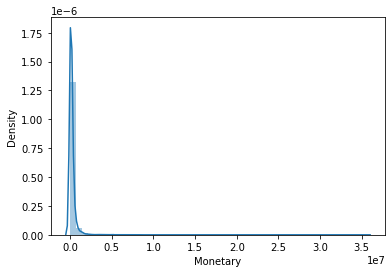

In [78]:
sns.distplot(RFMScores['Monetary'])

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

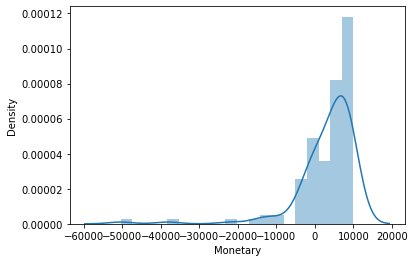

In [79]:
x=RFMScores.query("Monetary<10000")['Monetary']
sns.distplot(x)

In [80]:
# split the data into four segments using quantile method

quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles=quantiles.to_dict()


In [81]:
quantiles

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 9.0, 0.5: 16.0, 0.75: 33.0},
 'Monetary': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [82]:
# Function to cteate R F M segments

def RScores(x,q,d):
    if x<= q[d][0.25]:
        return 1
    elif x <= q[d][0.50]:
        return 2
    elif x <= q[d][0.75]:
        return 3
    else :
        return 4
    
def FnMScores(x,q,d):
    if x <= q[d][0.25]:
        return 4
    elif x <= q[d][0.50]:
        return 3
    elif x <= q[d][0.75] :
        return 2
    else :
        return 1
    


In [83]:
RFMScores.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [84]:
RFMScores["R"]=RFMScores['Recency'].apply(RScores,args=(quantiles,'Recency',))
RFMScores["F"]=RFMScores['Frequency'].apply(FnMScores,args=(quantiles,'Frequency'))
RFMScores["M"]=RFMScores['Monetary'].apply(FnMScores,args=(quantiles,'Monetary'))

In [85]:
RFMScores.head(20)

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
2.0,4,63,553704.0,1,1,1
3.0,77,18,257404.0,4,2,1
4.0,20,10,176613.0,3,3,2
5.0,18,7,41976.0,2,4,3
6.0,9,42,151822.0,1,1,2
7.0,208,4,9410.0,4,4,4
8.0,234,10,135550.0,4,3,2
9.0,15,7,65832.0,2,4,3
10.0,16,22,331601.0,2,2,1


In [86]:
RFMScores['RFM']=RFMScores['R'].map(str)+RFMScores['F'].map(str)+RFMScores['M'].map(str)
RFMScores['RFMScore']=RFMScores[['R','F','M']].sum(axis=1)

In [87]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFMScore
CustomerID,,,,,,,,
2.0,4,63,553704.0,1,1,1,111,3
3.0,77,18,257404.0,4,2,1,421,7
4.0,20,10,176613.0,3,3,2,332,8
5.0,18,7,41976.0,2,4,3,243,9
6.0,9,42,151822.0,1,1,2,112,4


In [88]:
# Assign Loyality level to each customer

Loyalty_level = ['Diamond','Platinum','Gold','Silver']

score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_level)

RFMScores['RFM_Loyalty_level'] = score_cuts.values
RFMScores.reset_index().head(20)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFMScore,RFM_Loyalty_level
0,2.0,4,63,553704.0,1,1,1,111,3,Diamond
1,3.0,77,18,257404.0,4,2,1,421,7,Platinum
2,4.0,20,10,176613.0,3,3,2,332,8,Platinum
3,5.0,18,7,41976.0,2,4,3,243,9,Gold
4,6.0,9,42,151822.0,1,1,2,112,4,Diamond
5,7.0,208,4,9410.0,4,4,4,444,12,Silver
6,8.0,234,10,135550.0,4,3,2,432,9,Gold
7,9.0,15,7,65832.0,2,4,3,243,9,Gold
8,10.0,16,22,331601.0,2,2,1,221,5,Diamond
9,11.0,9,10,771439.0,1,3,1,131,5,Diamond


In [89]:
# validate the data for RFMGroup = 111

RFMScores[RFMScores.RFM=='111'].sort_values('Monetary',ascending=False).reset_index().head(10)



,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFMScore,RFM_Loyalty_level
0,1704.0,3,235,35536194.0,1,1,1,111,3,Diamond
1,1896.0,2,356,17743855.0,1,1,1,111,3,Diamond
2,56.0,10,108,14357682.0,1,1,1,111,3,Diamond
3,1346.0,9,237,12647317.0,1,1,1,111,3,Diamond
4,3802.0,3,236,12319439.0,1,1,1,111,3,Diamond
5,4234.0,3,94,10654918.0,1,1,1,111,3,Diamond
6,1006.0,5,211,9351019.0,1,1,1,111,3,Diamond
7,3203.0,5,99,8102167.0,1,1,1,111,3,Diamond
8,2193.0,1,357,7966054.0,1,1,1,111,3,Diamond
9,1448.0,5,190,7892625.0,1,1,1,111,3,Diamond


In [90]:
# handle negative and zero values

"""def handle_neg_n_zero(num):
    if num<=0:
        return 1
    else:
        return num
    
RFMScores['Recency']=[handle_neg_n_zero(i) for i in RFMScores.Recency]
RFMScores['Monetary']=[handle_neg_n_zero(i) for i in RFMScores.Monetary]"""

"def handle_neg_n_zero(num):\n    if num<=0:\n        return 1\n    else:\n        return num\n    \nRFMScores['Recency']=[handle_neg_n_zero(i) for i in RFMScores.Recency]\nRFMScores['Monetary']=[handle_neg_n_zero(i) for i in RFMScores.Monetary]"

In [91]:
RFMScores['Monetary'].describe()

count    4.349000e+03
mean     2.299380e+05
std      8.572589e+05
min     -5.037200e+04
25%      3.814800e+04
50%      8.365500e+04
75%      2.056120e+05
max      3.553619e+07
Name: Monetary, dtype: float64

In [92]:
RFMScores=RFMScores.reset_index()

In [93]:
RFMScores.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFMScore,RFM_Loyalty_level
0,2.0,4,63,553704.0,1,1,1,111,3,Diamond
1,3.0,77,18,257404.0,4,2,1,421,7,Platinum
2,4.0,20,10,176613.0,3,3,2,332,8,Platinum
3,5.0,18,7,41976.0,2,4,3,243,9,Gold
4,6.0,9,42,151822.0,1,1,2,112,4,Diamond


In [94]:
new_data=RFMScores[['Recency','Frequency','Monetary']]
new_data

,Recency,Frequency,Monetary
0,4,63,553704.0
1,77,18,257404.0
2,20,10,176613.0
3,18,7,41976.0
4,9,42,151822.0
...,...,...,...
4344,17,7,20480.0
4345,181,6,10774.0
4346,12,11,24962.0
4347,4,132,280608.0


## Feature Scaling

<AxesSubplot:ylabel='Monetary'>

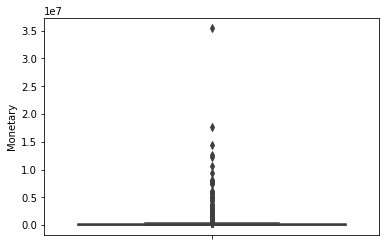

In [95]:
sns.boxplot(y = 'Monetary', data=RFMScores)

In [96]:
from sklearn.preprocessing import StandardScaler
scalobj = StandardScaler()
scaled_data = scalobj.fit_transform(new_data)
scaled_data

array([[-0.64079551,  1.05990701,  0.3777193 ],
       [ 0.17351282, -0.27973676,  0.03204302],
       [-0.46231697, -0.51789565, -0.06221123],
       ...,
       [-0.55155624, -0.48812579, -0.23913379],
       [-0.64079551,  3.11402747,  0.0591138 ],
       [-0.1165148 , -0.13088745,  0.03836156]])

In [97]:
scaled_data = pd.DataFrame(scaled_data, index =RFMScores.index, columns= new_data.columns)

In [98]:
scaled_data.head()

,Recency,Frequency,Monetary
0,-0.640796,1.059907,0.377719
1,0.173513,-0.279737,0.032043
2,-0.462317,-0.517896,-0.062211
3,-0.484627,-0.607205,-0.219285
4,-0.585021,0.434740,-0.091133


## Build Clustering Model 

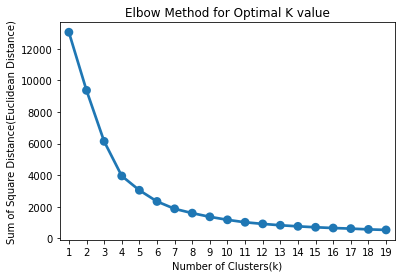

In [99]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}

for k in range(1,20):
    km = KMeans(n_clusters = k, init='k-means++', max_iter=300)
    km = km.fit(scaled_data)
    sum_of_sq_dist[k] = km.inertia_
    
# Visualisation for getting elbow method (to find the actual k value)

sns.pointplot(x = list(sum_of_sq_dist.keys()),
             y = list(sum_of_sq_dist.values()))
plt.xlabel("Number of Clusters(k)")
plt.ylabel("Sum of Square Distance(Euclidean Distance)")
plt.title("Elbow Method for Optimal K value")
plt.show()

<AxesSubplot:>

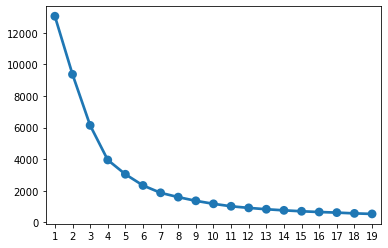

In [117]:
sns.pointplot(list(sum_of_sq_dist.keys()),list(sum_of_sq_dist.values()))

In [130]:
km = KMeans(n_clusters = 6, init='k-means++', max_iter=300)
km.fit(scaled_data)

KMeans(n_clusters=6)

In [131]:
y_kmeans = km.fit_predict(scaled_data)

In [132]:
y_kmeans

array([4, 0, 0, ..., 0, 2, 0])

In [133]:
RFMScores['Cluster'] = km.labels_
RFMScores.head(20)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFMScore,RFM_Loyalty_level,Cluster
0,2.0,4,63,553704.0,1,1,1,111,3,Diamond,4
1,3.0,77,18,257404.0,4,2,1,421,7,Platinum,0
2,4.0,20,10,176613.0,3,3,2,332,8,Platinum,0
3,5.0,18,7,41976.0,2,4,3,243,9,Gold,0
4,6.0,9,42,151822.0,1,1,2,112,4,Diamond,4
5,7.0,208,4,9410.0,4,4,4,444,12,Silver,3
6,8.0,234,10,135550.0,4,3,2,432,9,Gold,3
7,9.0,15,7,65832.0,2,4,3,243,9,Gold,0
8,10.0,16,22,331601.0,2,2,1,221,5,Diamond,0
9,11.0,9,10,771439.0,1,3,1,131,5,Diamond,0


In [134]:
RFMScores.to_csv('new_cluster_data.csv')